In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv("C:/Uconn MSBA/studies/Kaggle/data and code/timeseries/milkProduction.csv")

In [3]:
df.head()

,Date,Milk_Production
0,1-Jan-03,578.3
1,1-Feb-03,609.8
2,1-Mar-03,628.4
3,1-Apr-03,665.6
4,1-May-03,713.8


In [5]:
df.iat[0,0]

'1-Jan-03'

In [4]:
print(df.dtypes)

Date                object
Milk_Production    float64
dtype: object


In [5]:
df['Milk_Production']=df['Milk_Production'].astype(int)

In [6]:
print(df.dtypes)

Date               object
Milk_Production     int32
dtype: object


In [7]:
df['New_Date']=pd.to_datetime(df['Date'])

In [8]:
del df['Date']

In [9]:
df.head()

,Milk_Production,New_Date
0,578,2003-01-01
1,609,2003-02-01
2,628,2003-03-01
3,665,2003-04-01
4,713,2003-05-01


In [10]:
print(df.dtypes)

Milk_Production             int32
New_Date           datetime64[ns]
dtype: object


In [11]:

#setting date as index
df =df.set_index('New_Date')

In [12]:
df.head()

,Milk_Production
New_Date,
2003-01-01,578
2003-02-01,609
2003-03-01,628
2003-04-01,665
2003-05-01,713


In [13]:
df=df.groupby('New_Date')['Milk_Production'].sum()

#  Check Stationarity of a Time Series

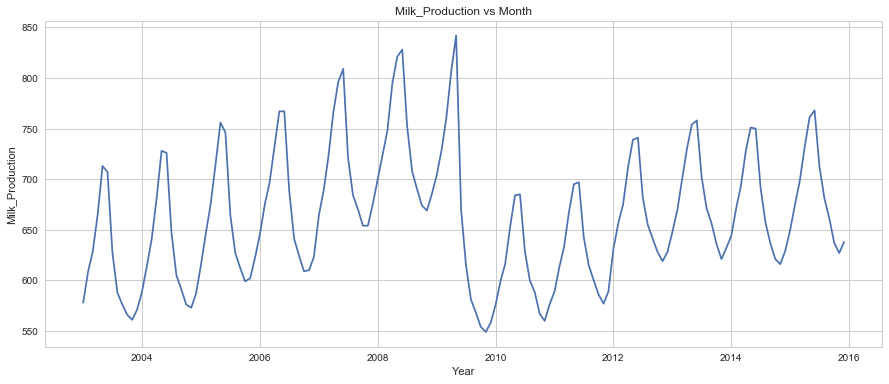

In [14]:
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Milk_Production')
plt.title('Milk_Production vs Month')
plt.grid(True)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\prachi-mudit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


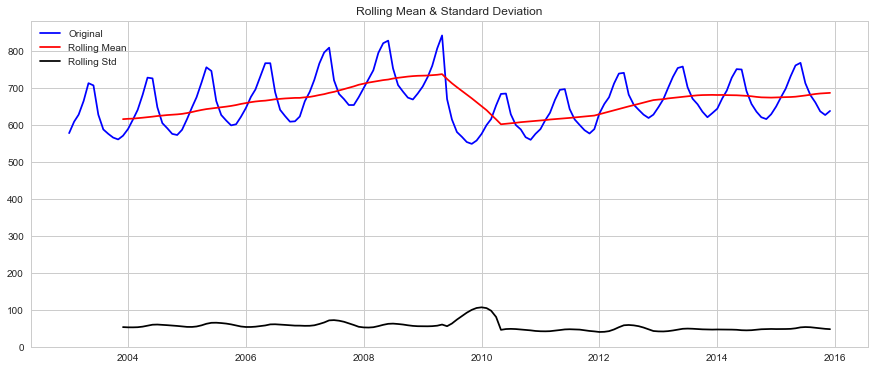

Results of Dickey-Fuller Test:
Test Statistic                  -2.859045
p-value                          0.050322
#Lags Used                      13.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


In [16]:
test_stationarity(df)

# To make a Time Series Stationary

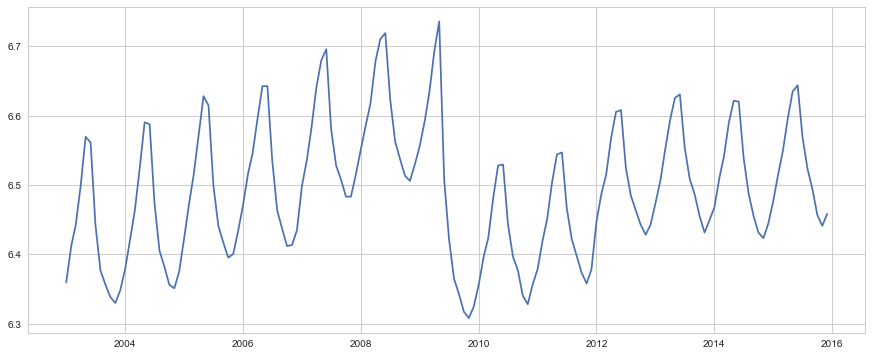

In [17]:
df_log = np.log(df)
plt.plot(df_log)
plt.show()

# Moving average

C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


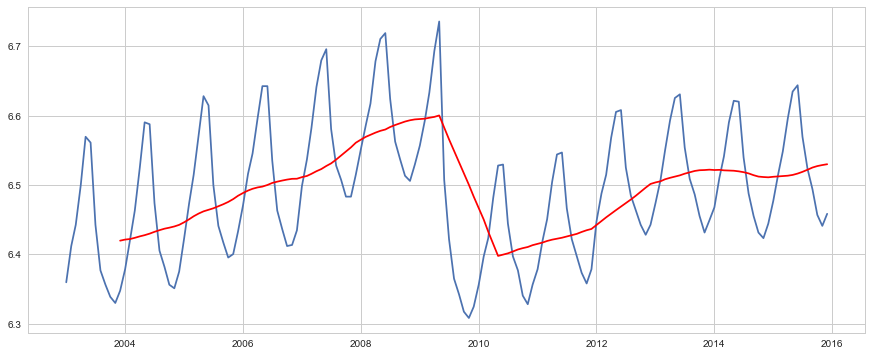

In [18]:
moving_avg = pd.rolling_mean(df_log,12)
plt.plot(df_log)
plt.plot(moving_avg, color='red')
plt.show()

In [19]:
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.head(12)

New_Date
2003-01-01        NaN
2003-02-01        NaN
2003-03-01        NaN
2003-04-01        NaN
2003-05-01        NaN
2003-06-01        NaN
2003-07-01        NaN
2003-08-01        NaN
2003-09-01        NaN
2003-10-01        NaN
2003-11-01        NaN
2003-12-01   -0.07222
Name: Milk_Production, dtype: float64

C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


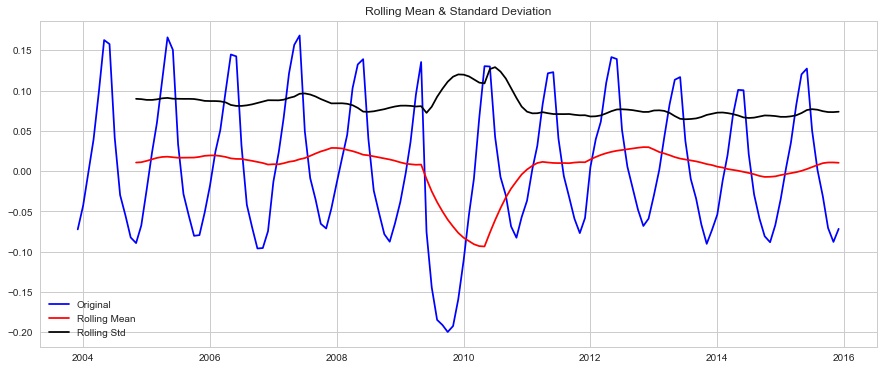

Results of Dickey-Fuller Test:
Test Statistic                  -3.423793
p-value                          0.010174
#Lags Used                      13.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [20]:
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

#  exponentially weighted moving average

C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


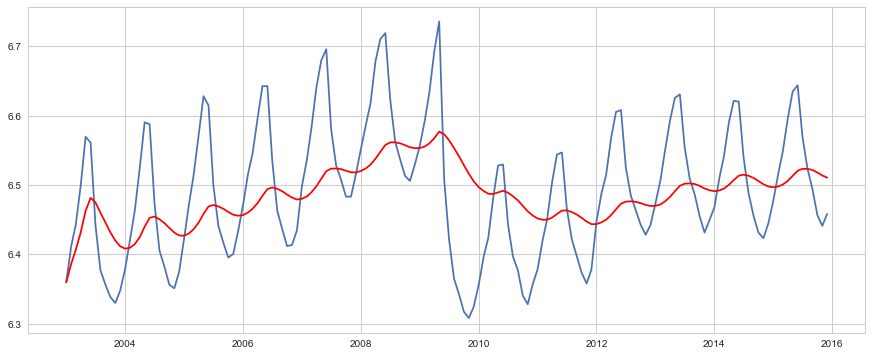

In [21]:
expwighted_avg = pd.ewma(df_log, halflife=12)
plt.plot(df_log)
plt.plot(expwighted_avg, color='red')
plt.show()

C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


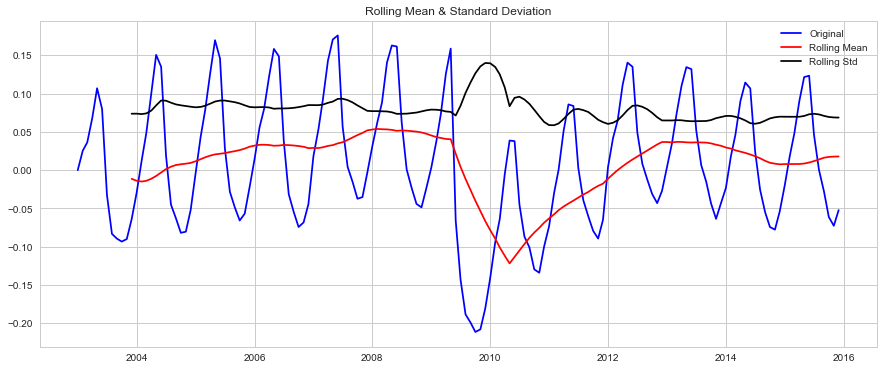

Results of Dickey-Fuller Test:
Test Statistic                  -2.988798
p-value                          0.035954
#Lags Used                      13.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


In [22]:
df_log_ewma_diff = df_log - expwighted_avg
test_stationarity(df_log_ewma_diff)


# Eliminating Trend and Seasonality

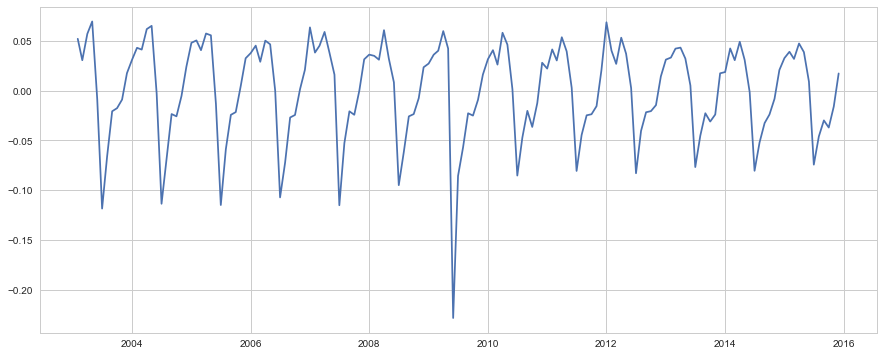

In [23]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)
plt.show()

C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


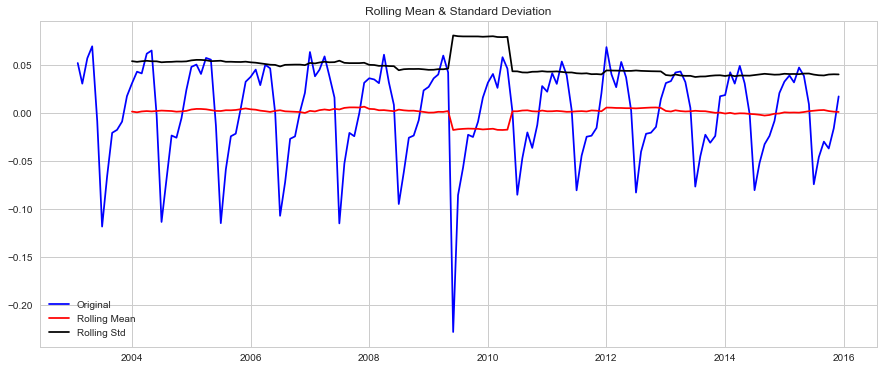

Results of Dickey-Fuller Test:
Test Statistic                  -2.399372
p-value                          0.141914
#Lags Used                      12.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


In [24]:
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

# Decomposing

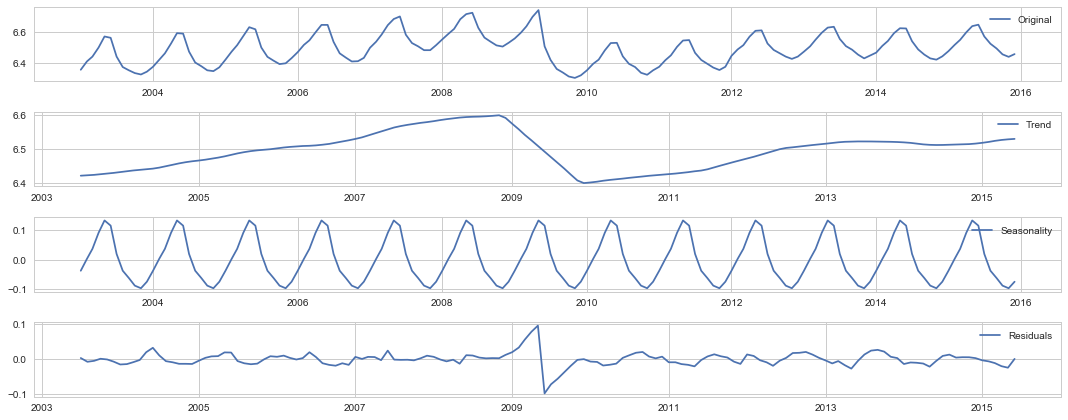

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


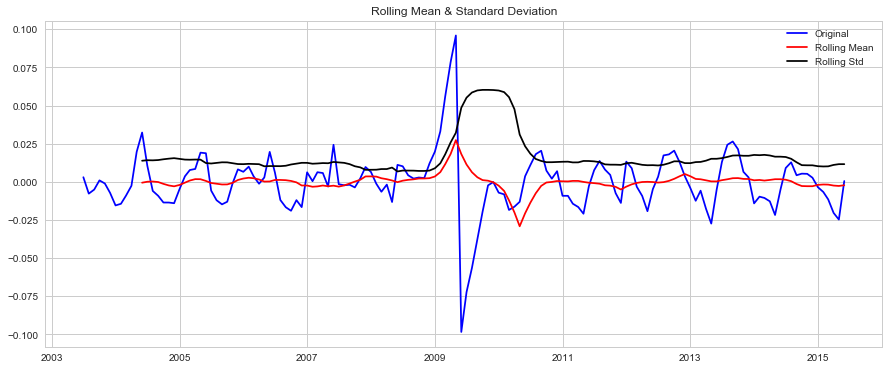

Results of Dickey-Fuller Test:
Test Statistic                -7.023671e+00
p-value                        6.446265e-10
#Lags Used                     3.000000e+00
Number of Observations Used    1.400000e+02
Critical Value (1%)           -3.477945e+00
Critical Value (5%)           -2.882416e+00
Critical Value (10%)          -2.577902e+00
dtype: float64


In [26]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
test_stationarity(df_log_decompose)

# Forecasting a Time Series

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [28]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

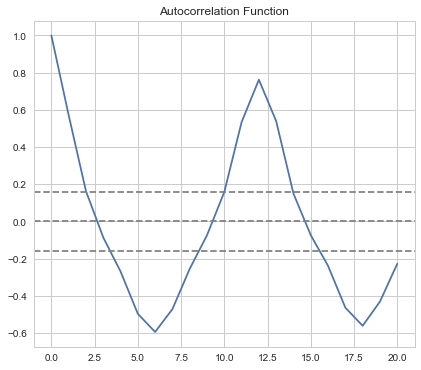

In [29]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

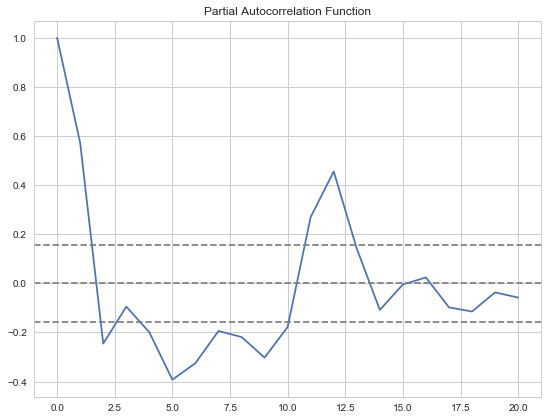

In [30]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [31]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model

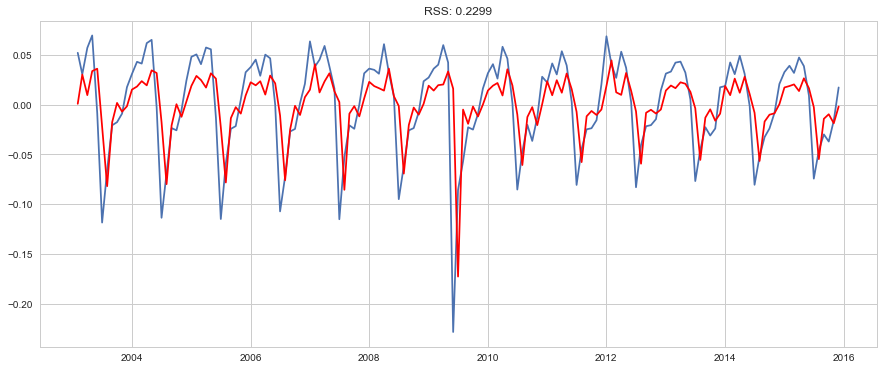

In [32]:
model = ARIMA(df_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log_diff)**2))
plt.show()

# MA Model

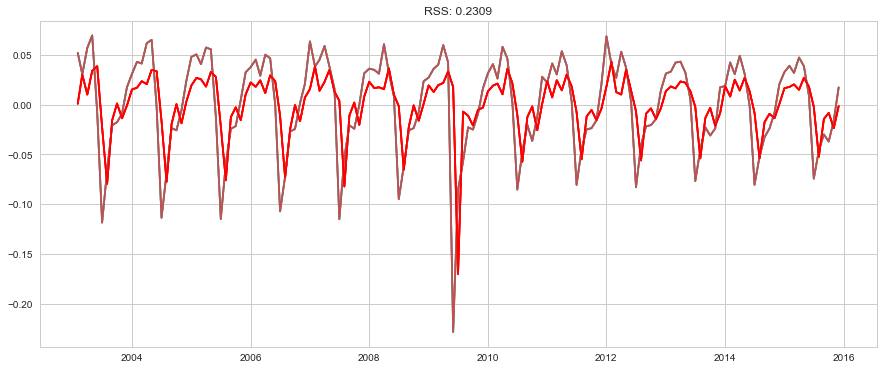

In [44]:
model = ARIMA(df_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff)**2))
plt.show()

# Combined Model

C:\Users\prachi-mudit\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


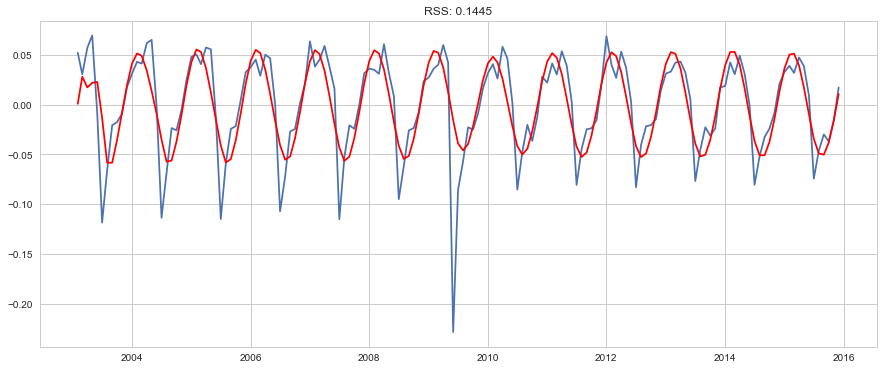

In [46]:
model = ARIMA(df_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff)**2))
plt.show()

# Taking it back to original scale

In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print( predictions_ARIMA_diff.head())

New_Date
2003-02-01    0.000953
2003-03-01    0.028176
2003-04-01    0.017439
2003-05-01    0.022021
2003-06-01    0.022963
dtype: float64


In [51]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

New_Date
2003-02-01    0.000953
2003-03-01    0.029129
2003-04-01    0.046568
2003-05-01    0.068589
2003-06-01    0.091552
dtype: float64


In [52]:
predictions_ARIMA_log = pd.Series(df_log.ix[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

New_Date
2003-01-01    6.359574
2003-02-01    6.360527
2003-03-01    6.388703
2003-04-01    6.406142
2003-05-01    6.428163
dtype: float64

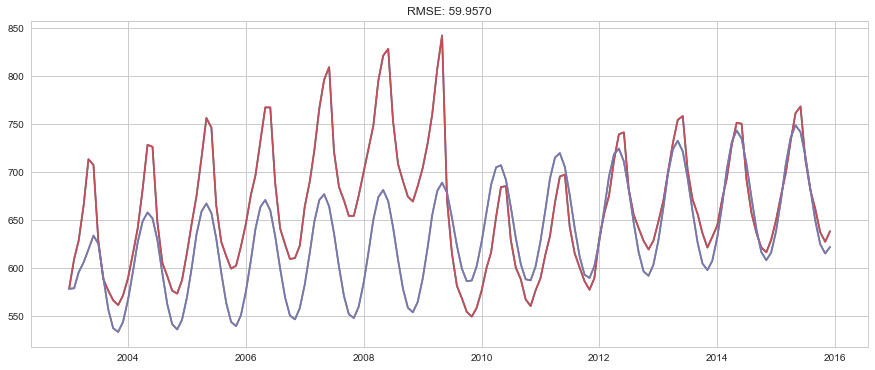

In [56]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))
plt.show()